In [166]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [167]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/vgames2.csv')

df = df.drop('Unnamed: 0', axis = 1)

df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [168]:
def change_unit(value):
  if 'K' in value:
    value, trash = value.split('K')
    value = float(value) * 1000
    value /= 1000000
    return value
  elif 'M' in value:
    value, trash = value.split('M')
    value = float(value) * 1000000
    value /= 1000000
    return value
  else:
    return float(value)


df['NA_Sales'] = df['NA_Sales'].apply(change_unit)
df['EU_Sales'] = df['EU_Sales'].apply(change_unit)
df['JP_Sales'] = df['JP_Sales'].apply(change_unit)
df['Other_Sales'] = df['Other_Sales'].apply(change_unit)


df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [169]:
# 1. 지역에 따라 선호하는 게임 장르가 다를까?

eu_df =  df[['EU_Sales', 'Genre']]
na_df = df[['NA_Sales', 'Genre']]
jp_df = df[['JP_Sales', 'Genre']]
other_df = df[['Other_Sales', 'Genre']]

eu_df.shape, na_df.shape, jp_df.shape, other_df.shape

((16598, 2), (16598, 2), (16598, 2), (16598, 2))

In [170]:
eu_df = eu_df[(eu_df.EU_Sales != 0)]
na_df =na_df[(na_df.NA_Sales != 0)]
jp_df = jp_df[(jp_df.JP_Sales != 0)]
other_df = other_df[(other_df.Other_Sales != 0)]

eu_df.shape, na_df.shape, jp_df.shape, other_df.shape

((10868, 2), (12099, 2), (6143, 2), (10121, 2))

In [171]:
total_group = eu_df.groupby('Genre').count()
na_group = na_df.groupby('Genre').count()
jp_group = jp_df.groupby('Genre').count()
other_group = other_df.groupby('Genre').count()

total_group['NA_Sales'] = na_group['NA_Sales']
total_group['JP_Sales'] = jp_group['JP_Sales']
total_group['Other_Sales'] = other_group['Other_Sales']

total_group = total_group.reset_index(drop = False)
total_group

,Genre,EU_Sales,NA_Sales,JP_Sales,Other_Sales
0,Action,2452,2573,1161,2153
1,Adventure,492,544,739,451
2,Fighting,543,594,464,499
3,Misc,957,1204,536,1029
4,Platform,726,798,275,603
5,Puzzle,307,444,155,302
6,Racing,1020,1097,230,852
7,Role-Playing,771,855,1049,800
8,Shooter,1080,1146,378,927
9,Simulation,505,617,270,550


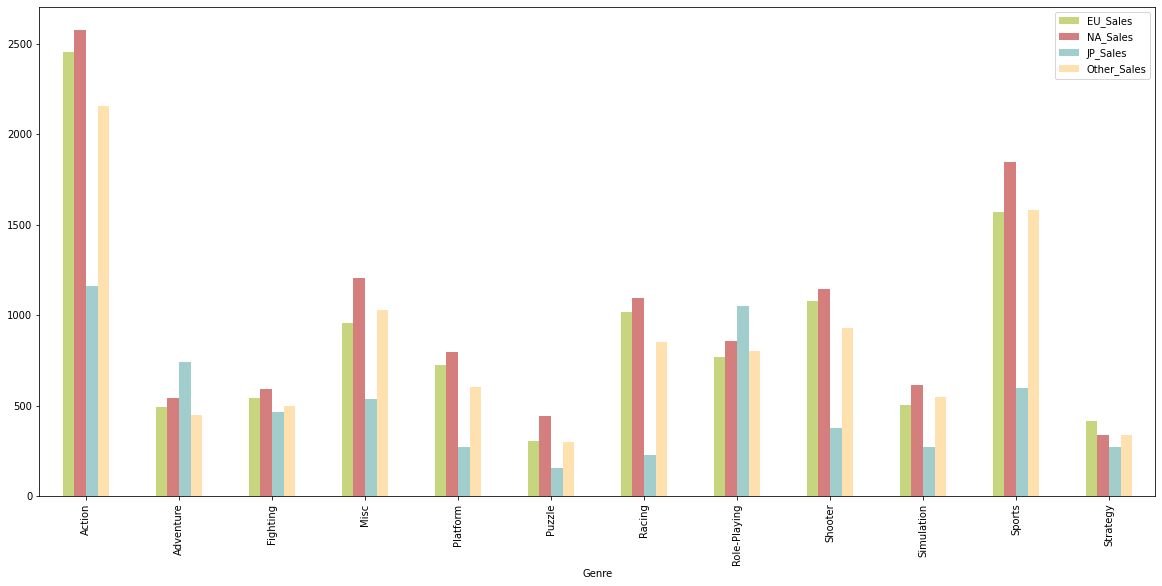

In [165]:
import matplotlib.pyplot as plt


total_group.plot(
    x='Genre', 
    y=['EU_Sales', 'NA_Sales', 'JP_Sales', 'Other_Sales'], 
    kind="bar",
    figsize=(20,9), 
    color = ['#C6D57E', '#D57E7E', '#A2CDCD', '#FFE1AF']
)
plt.show()
